# Final Project - Fundamentals of Deep Learning for NLP and CV

Congratulations! This is the final project!


## Delivery of Project

This jupyter notebook is to be delivered to evaluate your knowledge on the Deep Learning for NLP and CV module at Rumos, before date agreed with the professor. Please add your name and e-mail next.

**Student Name**: Nuno Pereira  
**E-mail**: pereiranuno88@gmail.com


## Instructions




## Details on the dataset





## Plagiarism

Always remember that you are here to learn. Discussions on the final project are highly incentivised but please do not share your work. The struggle to solve the problems is needed in order to become a true Data Scientist. By allowing others to use your code you are making the world a worse place: you are not truly helping your colleague, and you are not promoting discussions on the topic.

In case you need help, or just want to discuss some project-related topics, reach out to me either through email or through a Slack direct message.

# Objectives

Please solve the following exercises by creating a markdown cell with **# EXERCISE >>NUMBER<<**  just before you solve it (you can use the number of cells you need after that).

## Evaluation
Points (of a total of 100%):
1. 20%  
2. 20%  
3. 20%  
4. 20%  
5. 20%  

Final 5% for additional effort and conclusions beyond what was asked (give your _extra mile_).

## Important notes
1. Data Science is all about *flow*. Keep your analysis work-flow consistent.  
2. When it is requested you to *describe* something, please be 1. skeptic, 2. objective, and 3. succinct! 
3. If you don't know: search, invent, study, but please don't leave any exercise blank.

### Good luck!
# 3, 2, 1, GO! GO! GO!

### Import libraries

---

In [199]:
import pandas as pd
import torch
import torchvision
import torchvision.transforms as transforms
import torch.nn as nn
import torch.nn.functional as F
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix
import seaborn as sns


### Constants

---

In [200]:
EPOCHS= 10
RANDOM_SEED = 42

---

In [201]:
# Global variables for reproducibility
torch.manual_seed(RANDOM_SEED)

### Load Data

### CIFAR-10Dataset

The CIFAR-10 dataset consists of 60000 32x32 colour images in 10 classes, with 6000 images per class. There are 50000 training images and 10000 test images.

The dataset is divided into five training batches and one test batch, each with 10000 images. The test batch contains exactly 1000 randomly-selected images from each class. The training batches contain the remaining images in random order, but some training batches may contain more images from one class than another. Between them, the training batches contain exactly 5000 images from each class. 

<img src="images/cifar10.png" width="400" height="100">

[CIFAR 10](https://www.cs.toronto.edu/~kriz/cifar.html)

In [202]:
transform = transforms.Compose(
    [
        transforms.Resize((32,32)),
        transforms.ToTensor(),
        transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
    ])

batch_size = 64

trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size,
                                          shuffle=True, num_workers=0)

testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size,
                                         shuffle=False, num_workers=0)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

Files already downloaded and verified
Files already downloaded and verified


### Twitter Dataset

[Source - huggingface.co/datasets - carblacac/twitter-sentiment-analysis](https://huggingface.co/datasets/carblacac/twitter-sentiment-analysis)

In [203]:
twitter_df = pd.read_csv("data/twitter.csv", sep="\t", header=None, names=["target", "text"])
twitter_df.head()

,target,text
0,"target,text",NaN
1,"0,Starting back at work today Looks like it...",NaN
2,"1,Sugar levels dropping... munchies setting in...",NaN
3,"1,@karineb22 yeah!!! have a great summer break!",NaN
4,"1,hannah montana was very good. now going to ...",NaN


In [204]:
twitter_df.shape

(149986, 2)

# EXERCISE 1 - Use CIFAR10 Dataset

```classes = ('plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')```

- Build a simple Neural Network without using convolutional layers to predict the image class
    - No need to configure the optimization, loss function or predict yet. Only implement the NN architecture as ```class NeuralNetwork(nn.Module)```
- Explain your choices for the model architecture e.g., activation layer, input and output

---

In [205]:
class NeuralNetwork(nn.Module):
    def __init__(self):
        super().__init__()
        
        # Primeira camada 3 canais (RGB) *  32x32 pixels : 3072 → 768 neurónios
        self.hidden1 = nn.Linear(3*32*32, 768)
        
        # Segunda camada oculta: 768 → 384 neurónios
        self.hidden2 = nn.Linear(768, 384)
        
        # Terceira camada oculta: 384 → 192 neurónios
        self.hidden3 = nn.Linear(384, 192)
        
        # Camada de saída: 192 → 10 neurónios (correspondentes às 10 classes do CIFAR-10)
        self.out = nn.Linear(192, 10)
        
        # Dropout com probabilidade de 20% para evitar overfitting
        self.dropout = nn.Dropout(0.2)

    def forward(self, x):
        # Achatar a imagem (flatten) para vetor 1D, ada imagem passa a ser um vetor com 3072 números, pronto para entrar numa camada Linear.
        x=x.view(-1,32*32*3)
        
        # Passagem pela primeira camada com ReLU e Dropout
        x = F.relu(self.hidden1(x))
        x = self.dropout(x)
        
        # Segunda camada com ReLU e Dropout
        x = F.relu(self.hidden2(x))
        x = self.dropout(x)
        
        # Terceira camada com ReLU
        x = F.relu(self.hidden3(x))
        
        x = self.out(x)
        
        return x


A rede neural construída é composta por três camadas ocultas e uma camada de saída, desenvolvida para classificar imagens do conjunto de dados CIFAR-10. Como as imagens têm dimensão 32x32 píxeis com 3 canais (RGB), cada imagem é composta por um total de 3072 píxeis. Antes de ser processada pela rede, cada imagem é achatada e  transformando-se num vetor unidimensional com 3072 elementos, o que permite a sua passagem por camadas lineares.

A primeira camada oculta da rede transforma este vetor de 3072 valores num vetor de 768 neurónios, ao qual é aplicada a função de ativação ReLU para introduzir não-linearidade. Em seguida, é aplicado um Dropout de 20%, que desativa aleatoriamente uma parte dos neurónios durante o treino, reduzindo o risco de overfitting. Esta combinação (Linear → ReLU → Dropout) repete-se na segunda camada oculta (768 → 384 neurónios) e na terceira camada oculta (384 → 192 neurónios), mantendo a regularização e promovendo uma redução progressiva da dimensionalidade.

Por fim, a camada de saída converte os 192 neurónios da última camada oculta num vetor de 10 saídas, correspondentes às 10 classes do CIFAR-10 ('plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck').

---

# Exercise 2 - Use CIFAR10 Dataset
- Set the optimizer, loss function and train your model
    - Explain your choices for the optimizer and loss function
- Check the performance of your model
    - Chose the metric and explain your choice

---

In [206]:
# Instanciar o modelo
model = NeuralNetwork()

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

# Definir a função de perda e o otimizador
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

Nesta secção, é feita a preparação do modelo para o processo de treino.

Primeiramente, a classe NeuralNetwork é instanciada, criando-se um objeto chamado model que representa a arquitetura da rede neural definida anteriormente.

De seguida, é determinado o dispositivo onde o modelo será treinado. Utiliza-se a função torch.device("cuda" if torch.cuda.is_available() else "cpu"), que verifica automaticamente se existe uma placa gráfica (GPU) compatível com CUDA disponível. Se existir, o modelo será treinado na GPU, o que acelera significativamente o processo; caso contrário, o treino decorre no processador (CPU).


Depois, define-se a função de perda (loss function), que neste caso é a CrossEntropyLoss. Esta função foi escolhida tendo em conta que temos um problema de classificação multiclasse, como é o caso do CIFAR-10.

Por fim, é criado o otimizador, que neste caso é o Adam. É inicializado com os parâmetros do modelo (model.parameters()) e com uma taxa de aprendizagem (learning rate) de 0.001, que controla o quão rapidamente os pesos da rede são ajustados durante o treino.

In [207]:
def train_model(model, dataloader, optimizer, loss_fn, device):
    model.train()
    total_loss = 0

    for batch_idx, (inputs, targets) in enumerate(dataloader):
        inputs, targets = inputs.to(device), targets.to(device)

        outputs = model(inputs)
        loss = loss_fn(outputs, targets)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        total_loss += loss.item()

    average_loss = total_loss / len(dataloader)
    return average_loss

A função train_one_epoch  recebe como argumentos o modelo, o dataloader (que fornece os dados em lotes), o otimizador, a função de perda e o dispositivo onde os cálculos devem ser realizados (CPU ou GPU).

O primeiro passo é colocar o modelo em modo de treino através de model.train(). Este modo ativa componentes como o Dropout, caso existam, garantindo que o comportamento do modelo é o apropriado para a fase de aprendizagem.

De seguida, é inicializada uma variável total_loss que irá acumular o valor da perda (erro) ao longo de todos os lotes processados.

O ciclo principal da função percorre o dataloader, recebendo os dados (inputs) e os rótulos correspondentes (targets) em cada iteração. 

As previsões são comparadas com as labels reais através da função de perda (loss_fn), que calcula o erro cometido.

Antes de atualizar os pesos do modelo, é necessário limpar os gradientes anteriores com optimizer.zero_grad(). 
Depois disso, realiza-se a propagação para trás (backward pass), onde os gradientes do erro em relação aos pesos são calculados com loss.backward(). Finalmente, o otimizador atualiza os pesos da rede com optimizer.step().


No final  a função calcula a perda média dividindo a perda acumulada pelo número total de lotes, e devolve esse valor.

In [208]:
def evaluate_model(model, dataloader, loss_fn, device):
    model.eval()
    total_loss = 0
    total_correct = 0
    total_samples = 0

    with torch.no_grad():
        for inputs, targets in dataloader:
            inputs, targets = inputs.to(device), targets.to(device)

            outputs = model(inputs)
            loss = loss_fn(outputs, targets)
            total_loss += loss.item()

            predictions = outputs.argmax(dim=1)
            total_correct += (predictions == targets).sum().item()
            total_samples += targets.size(0)

    avg_loss = total_loss / len(dataloader)
    accuracy = 100 * total_correct / total_samples
    return avg_loss, accuracy


A função evaluate_model serve para avaliar o desempenho do modelo sobre o conjunto de dados. Esta função recebe como argumentos o modelo a avaliar, o dataloader com os dados a testar, a função de perda utilizada e o dispositivo onde os cálculos devem ser realizados (CPU ou GPU).

O  modelo é colocado em modo de avaliação com model.eval(). Esta instrução garante que o modelo se comporta corretamente nesta fase, desativando por exemplo camadas como o Dropout, que só são úteis durante o treino.

São depois inicializadas três variáveis: total_loss, para acumular o valor total da perda; total_correct, que conta quantas previsões foram corretas; e total_samples, que regista o número total de amostras avaliadas.

O bloco with torch.no_grad() é utilizado para garantir que o PyTorch não calcula nem guarda gradientes durante esta fase, o que melhora o desempenho e reduz o uso de memória, já que não há necessidade de retropropagação nesta etapa.

O ciclo for percorre todos os lotes de dados no dataloader. Para cada lote, os dados (inputs) e os rótulos verdadeiros (targets) são enviados para o dispositivo apropriado (GPU ou CPU).


As previsões são depois convertidas nas classes previstas pelo modelo, utilizando argmax(dim=1), que seleciona o índice com maior valor de saída (ou seja, a classe mais provável). A função compara estas previsões com os rótulos verdadeiros para contar quantas previsões foram corretas, incrementando total_correct. O número de amostras do lote é igualmente somado ao contador total_samples.

Após o ciclo, é calculada a perda média, dividindo o valor total da perda pelo número de lotes (len(dataloader)). A métrica Accuracy  é calculada como a percentagem de previsões corretas em relação ao total de amostras avaliadas.


In [209]:
def train_and_evaluate(model, trainloader, testloader, optimizer, criterion, device, epochs=5):
    for epoch in range(epochs):
        print(f"Epoch {epoch + 1}/{epochs}")

        train_loss = train_model(model, trainloader, optimizer, criterion, device)
        val_loss, val_acc = evaluate_model(model, testloader, criterion, device)

        print(f"  → Train Loss: {train_loss:.4f}")
        print(f"  → Validation Loss: {val_loss:.4f} | Accuracy: {val_acc:.2f}%\n")

    print("Training completed!")

In [210]:
train_and_evaluate(model, trainloader, testloader, optimizer, criterion, device, EPOCHS)

Epoch 1/10
  → Train Loss: 1.7082
  → Validation Loss: 1.5577 | Accuracy: 44.08%

Epoch 2/10
  → Train Loss: 1.5275
  → Validation Loss: 1.4527 | Accuracy: 49.02%

Epoch 3/10
  → Train Loss: 1.4439
  → Validation Loss: 1.4184 | Accuracy: 50.25%

Epoch 4/10
  → Train Loss: 1.3771
  → Validation Loss: 1.3928 | Accuracy: 51.17%

Epoch 5/10
  → Train Loss: 1.3264
  → Validation Loss: 1.3590 | Accuracy: 51.80%

Epoch 6/10
  → Train Loss: 1.2728
  → Validation Loss: 1.3452 | Accuracy: 52.57%

Epoch 7/10
  → Train Loss: 1.2329
  → Validation Loss: 1.3329 | Accuracy: 53.17%

Epoch 8/10
  → Train Loss: 1.1883
  → Validation Loss: 1.3276 | Accuracy: 53.62%

Epoch 9/10
  → Train Loss: 1.1521
  → Validation Loss: 1.3317 | Accuracy: 53.06%

Epoch 10/10
  → Train Loss: 1.1148
  → Validation Loss: 1.3209 | Accuracy: 54.90%

Training completed!


A variável epochs define o número total de iterações a realizar. O ciclo for itera esse número de vezes, controlando a progressão do treino. A cada iteração , imprime-se no ecrã o número da epoch atual.

Durante cada iteração, são chamadas duas funções principais:

   -train_model(...): esta função realiza o treino do modelo com base nos dados de treino (trainloader).

   -evaluate_model(...): após o treino, esta função avalia o desempenho do modelo no conjunto de teste (testloader).

Ao longo das iterações  observa-se uma redução progressiva da perda de treino, o que indica que o modelo está a conseguir ajustar-se aos dados de treino e a aprender padrões. A perda de treino começa em 0.82 na primeira iteração e desce para 0.69 na última, o que é um comportamento esperado e positivo.

No entanto, a perda de validação mantém-se praticamente estável e relativamente alta, a oscilar entre 1.41 e 1.53, sem mostrar sinais claros de melhoria. Isto, aliado a uma Accuracy  também estável, entre 54.5% e 55.9%, sugere que o modelo atingiu um patamar de desempenho limitado com a arquitetura atual e que pode estar a começar a sobreajustar-se (overfitting) aos dados de treino.


O modelo está a aprender durante o treino, mas não está a generalizar suficientemente bem para os dados de teste. A arquitetura e os hiperparâmetros permitem um desempenho razoável, com uma accuracy próxima dos 55%, o que está alinhado com redes densas simples (sem camada de convolução). 

In [211]:
def evaluate_by_class(model, dataloader, loss_fn, device, class_names):
    # Coloca o modelo em modo de avaliação (desativa Dropout, etc.)
    model.eval()

    total_loss = 0  # Acumula a perda total
    correct_per_class = [0 for _ in range(len(class_names))]  # Contador de previsões corretas por classe
    total_per_class = [0 for _ in range(len(class_names))]    # Total de amostras por classe

    # Desativa o cálculo de gradientes (não é necessário na avaliação)
    with torch.no_grad():
        for inputs, targets in dataloader:
            inputs, targets = inputs.to(device), targets.to(device)

            # Forward pass
            outputs = model(inputs)
            loss = loss_fn(outputs, targets)
            total_loss += loss.item()

            # Aplica Softmax apenas para obter probabilidades (não afeta as previsões)
            probs = F.softmax(outputs, dim=1)
            preds = torch.argmax(probs, dim=1)  # Previsão = índice da maior probabilidade

            # Conta as previsões corretas por classe
            for i in range(len(targets)):
                label = targets[i].item()
                prediction = preds[i].item()
                total_per_class[label] += 1
                if prediction == label:
                    correct_per_class[label] += 1

    # Calcula a perda média global
    avg_loss = total_loss / len(dataloader)

    # Mostra os resultados por classe
    print(f"\n Avaliação por classe:")
    for i, class_name in enumerate(class_names):
        if total_per_class[i] > 0:
            acc = 100 * correct_per_class[i] / total_per_class[i]
            print(f"  Classe '{class_name}': {acc:.2f}% ({correct_per_class[i]} / {total_per_class[i]})")
        else:
            print(f"  Classe '{class_name}': sem dados")

    # Acurácia geral
    overall_accuracy = 100 * sum(correct_per_class) / sum(total_per_class)
    print(f"\n Global Accuracy: {overall_accuracy:.2f}%")
    print(f" Average Loss: {avg_loss:.4f}")


A função evaluate_by_class tem como objetivo avaliar o desempenho de classificação do modelo por classe, ou seja, determinar a capacidade de classificação individual de cadadas classes, além de calcular.

O processo começa por colocar o modelo em modo de avaliação com model.eval(), o que garante que camadas como Dropout ou BatchNorm se comportem corretamente durante a fase de teste. Em seguida, são criadas duas listas: uma para contar o número de previsões corretas por classe e outra para contabilizar o total de amostras avaliadas por classe.

Durante a avaliação, utiliza-se o contexto torch.no_grad() para desativar o cálculo de gradientes, o que reduz o uso de memória e acelera o processo, uma vez que não há necessidade de retropropagação. O modelo percorre o conjunto de dados (dataloader) e, para cada batch, realiza a passagem para a frente (forward pass) para gerar as previsões. A perda é calculada usando a função de custo (loss_fn) e somada à perda total.

De seguida, aplica-se a função Softmax para converter as saídas do modelo em probabilidades (embora isto seja apenas para interpretação). 




In [212]:
evaluate_by_class(model, testloader, criterion, device, classes)


 Avaliação por classe:
  Classe 'plane': 60.30% (603 / 1000)
  Classe 'car': 68.80% (688 / 1000)
  Classe 'bird': 32.40% (324 / 1000)
  Classe 'cat': 40.00% (400 / 1000)
  Classe 'deer': 52.70% (527 / 1000)
  Classe 'dog': 43.30% (433 / 1000)
  Classe 'frog': 62.10% (621 / 1000)
  Classe 'horse': 59.80% (598 / 1000)
  Classe 'ship': 73.50% (735 / 1000)
  Classe 'truck': 56.10% (561 / 1000)

 Global Accuracy: 54.90%
 Average Loss: 1.3209


Com base nos resultados da avaliação por classe, é possível observar que o desempenho do modelo treinado sobre o conjunto CIFAR-10 não é uniforme entre as diferentes categorias. A precisão global do modelo é de 54,71%, o que representa um desempenho razoável tendo em conta que se trata de uma rede relativamente simples. A perda média de 1.3194 reforça a ideia de que o modelo ainda comete erros significativos, embora já consiga aprender padrões úteis.

Algumas classes, como 'ship', 'frog', 'car' e 'plane', apresentam previsões superiores a 60%, o que demonstra que o modelo consegue reconhecer bem objetos com formas mais distintas e características visuais marcantes. Por outro lado, classes como 'dog' (34,9%) e 'bird' (39,8%) revelam desempenhos mais fracos, o que pode dever-se à maior complexidade visual destas imagens ou à semelhança entre categorias, como por exemplo entre cães e gatos, ou aves e outros animais.

Este padrão sugere que o modelo tem maior facilidade em distinguir veículos (como 'ship', 'truck' ou 'car') do que animais.

Em suma, o modelo apresenta resultado razoável, mas desempenho inconsistente entre classes, destacando a importância de se aplicar estratégias adicionais para melhorar a capacidade de generalização, sobretudo em classes visualmente mais complexas.

In [213]:
def show_predictions(model, dataloader, class_names, device, num_images=20):
    model.eval()  # Define o modelo para modo de avaliação (desativa dropout, batch norm)
    images_shown = 0  # Contador de imagens exibidas
    plt.figure(figsize=(15, 8))  # Configuração do tamanho do gráfico

    with torch.no_grad():  # Desativa cálculo de gradientes para economizar memória
        for inputs, labels in dataloader:
            inputs, labels = inputs.to(device), labels.to(device)  # Move dados para a GPU/CPU conforme necessário
            outputs = model(inputs)  # Obtém previsões do modelo
            preds = torch.argmax(outputs, dim=1)  # Converte probabilidades para rótulos de classe

            for i in range(len(inputs)):  # Itera sobre cada imagem no lote atual
                if images_shown >= num_images:
                    break  # Para o loop se o número desejado de imagens já foi mostrado

                image = inputs[i].cpu().permute(1, 2, 0)  # Converte formato [C, H, W] para [H, W, C] para exibição
                image = image * 0.5 + 0.5  # Ajuste para desfazer normalização (-1 a 1 → 0 a 1)

                plt.subplot(4, 5, images_shown + 1)  # Organiza imagens em um grid de 4x5
                plt.imshow(image)  # Exibe a imagem
                pred_label = class_names[preds[i]]  # Obtém o nome da classe prevista
                true_label = class_names[labels[i]]  # Obtém o nome da classe verdadeira
                color = 'green' if preds[i] == labels[i] else 'red'  # Define a cor do título com base na correção da previsão
                plt.title(f"P: {pred_label}\nV: {true_label}", color=color, fontsize=9)  # Exibe previsões e valores reais
                plt.axis('off')  # Remove eixos para melhor visualização
                images_shown += 1  # Incrementa contador de imagens exibidas

            if images_shown >= num_images:
                break  # Certifica-se de que não exibe imagens além do necessário

    plt.suptitle("Previsões do Modelo (P = Previsto, V = Verdadeiro)", fontsize=14)  # Título geral do gráfico
    plt.tight_layout()  # Ajusta layout para evitar sobreposição de elementos
    plt.show()  # Exibe o gráfico final


A função show_predictions tem como objetivo visualizar de forma gráfica as previsões feitas pelo modelo, comparando os rótulos previstos com os rótulos reais, através de um conjunto de imagens retiradas do conjunto de teste. Assim desta forma conseguimos  perceber visualmente onde o modelo acerta e onde se engana. 

O processo começa por colocar o modelo em modo de avaliação com model.eval(), o que garante que camadas como Dropout ou Batch Normalization não introduzam aleatoriedade durante as previsões. Em seguida, a função entra num ciclo sem cálculo de gradientes (torch.no_grad()), o que reduz o uso de memória e acelera a execução, visto que não é necessário realizar retropropagação.

Para cada batch de imagens e respetivos rótulos, as imagens são enviadas para o device (CPU ou GPU), tal como os rótulos verdadeiros. O modelo calcula os outputs (logits), e a previsão final para cada imagem é obtida através da operação argmax, que devolve o índice da classe com maior probabilidade.

Cada imagem do lote é então formatada para visualização convertendo de [Chanel, Height, Width] (formato que o PyTorch usa internamente, porque é mais eficiente para cálculos em GPU) para [Height, Width, Chanel] (formato que permite que a imagem seja desenhada corretamente pelo imshow() com as cores nas posições certas no matpotlib). A imagem é desenhada com matplotlib, sendo exibido por cima o nome da classe prevista (P) e o nome da classe verdadeira (V). Se a previsão estiver correta, o título aparece a verde; caso contrário, aparece a vermelho — uma forma visual imediata de distinguir acertos de erros.


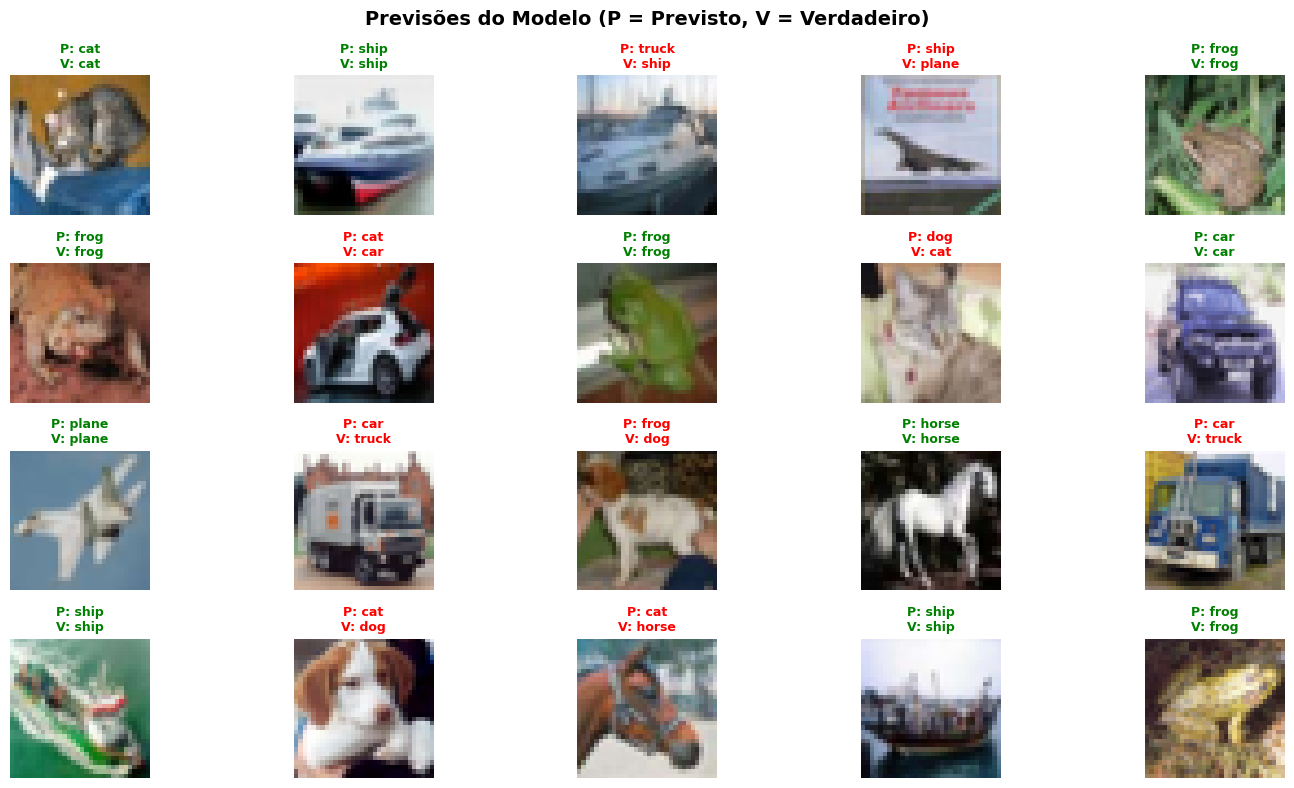

In [214]:
show_predictions(model, testloader, classes, device, num_images=20)

Ao observar os exemplos exibidos, nota-se que o modelo consegue realizar previsões corretas para uma diversidade considerável de classes, como 'cat', 'frog', 'plane', 'car', 'ship', 'horse' e 'dog', o que sugere que o modelo aprendeu a reconhecer padrões visuais relevantes. 
Contudo, também se verificam várias previsões incorretas. Por exemplo, 'truck' foi previsto numa imagem do tipo 'ship', ou 'deer' como 'cat', entre outros casos. Estas confusões indicam que o modelo ainda tem dificuldade em distinguir classes com características visuais semelhantes ou em imagens mais ambíguas. Em alguns casos, as imagens que originaram erros apresentam baixa nitidez, ou elementos visuais que dificultam a identificação.

No geral, esta visualização evidencia o que já tinhamos visto anteriormente em que o modelo tem alguma uma capacidade de generalização, mas ainda comete erros previsíveis em classes semelhantes entre si. 

In [215]:
def plot_confusion_matrix(model, dataloader, class_names, device):
    model.eval()
    all_preds = []
    all_targets = []

    with torch.no_grad():
        for inputs, targets in dataloader:
            inputs, targets = inputs.to(device), targets.to(device)
            outputs = model(inputs)
            preds = torch.argmax(outputs, dim=1)

            all_preds.extend(preds.cpu().numpy())
            all_targets.extend(targets.cpu().numpy())

    # Matriz de confusão
    cm = confusion_matrix(all_targets, all_preds)

    # Cria máscara para a parte superior (triângulo superior)
    mask = np.triu(np.ones_like(cm, dtype=bool))

    plt.figure(figsize=(10, 8))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Greys',
                xticklabels=class_names,
                yticklabels=class_names,
                mask=mask, linewidths=0.5)

    plt.xlabel('Classe Prevista')
    plt.ylabel('Classe Verdadeira')
    plt.title('Matriz de Confusão')
    plt.tight_layout()
    plt.show()

A função plot_confusion_matrix tem como objetivo visualizar graficamente a matriz de confusão de um modelo de classificação, de forma a avaliar o desempenho do mesmo na distinção entre diferentes classes. Esta análise permite perceber quais as classes são mais frequentemente confundidas entre si.

O processo começa por colocar o modelo em modo de avaliação com model.eval(), garantindo que camadas como Dropout ou Batch Normalization se comportam corretamente durante a inferência. Em seguida, com o bloco torch.no_grad(), são desativados os cálculos de gradientes, poupando memória e tempo de execução, dado que nesta fase apenas se pretende fazer previsões, não atualizar pesos.

Durante a iteração sobre o dataloader, a função envia as imagens (inputs) e os rótulos verdadeiros (targets) para o dispositivo apropriado (CPU ou GPU). O modelo faz a previsão para cada lote de imagens e a classe prevista é obtida através da função argmax, que seleciona o índice da classe com maior probabilidade para cada imagem. As previsões e os rótulos reais são acumulados em duas listas.

Depois de recolhidas todas as previsões e rótulos, a função calcula a matriz de confusão com confusion_matrix, que compara os rótulos verdadeiros com os previstos, contando quantas vezes cada classe foi corretamente ou incorretamente identificada.

Para tornar a visualização mais limpa e evitar duplicação de informação (uma vez que a matriz de confusão é simétrica), é aplicada uma máscara à parte superior da matriz com np.triu

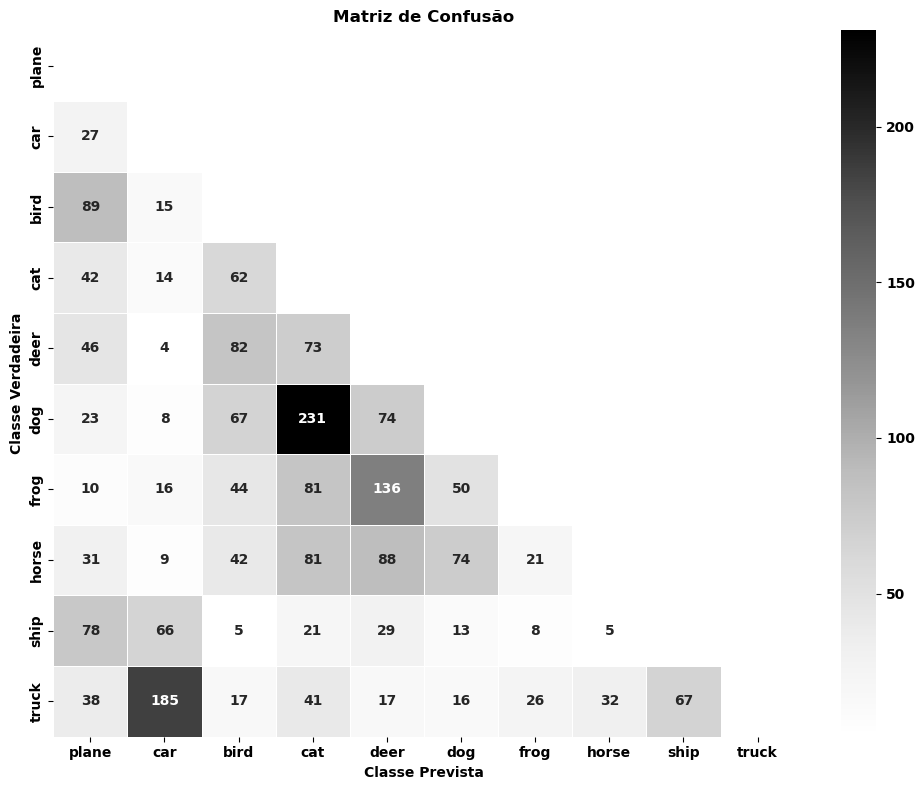

In [216]:
plot_confusion_matrix(model, testloader, classes, device)

A matriz de confusão resultante da rede sem camadas convolucionais revela graves limitações na capacidade do modelo distinguir entre categorias visuais, sobretudo entre classes que partilham formas ou contextos semelhantes.

Uma das observações mais marcantes da matriz é a confusão extremamente elevada entre as classes "dog" e "cat". O modelo previu a classe "cat" em 268 casos onde a classe verdadeira era "dog", o que representa um erro severo e recorrente. Este tipo de confusão é esperado em redes sem convoluções, uma vez que cães e gatos podem partilhar cores, poses e cenários semelhantes, e sem a capacidade de extrair características espaciais, o modelo não consegue distinguir bem entre eles.

Confusões semelhantes ocorrem entre "bird" e "plane" (com 104 erros), bem como entre "truck" e "car" (144 erros). Estas confusões sugerem que o modelo identifica mal veículos ou objetos com contornos parecidos, provavelmente devido à ausência de mecanismos de detecção de forma e contexto, que são características naturais de redes convolucionais.

A distribuição geral dos erros revela que as previsões estão espalhadas por várias classes, o que indica baixa confiança e fraca capacidade de generalização. 

---

# Exercise 3 - Use CIFAR10 Dataset
- Same as Exercise 1 but now add Convolutional Layers
- Explain your choices for the model architecture e.g., activation layer, input and output

---

In [217]:
class CNNModelConv(nn.Module):
    def __init__(self):
        super().__init__()
        
        # Bloco convolucional 1
        self.conv1 = nn.Conv2d(in_channels=3, out_channels=32, kernel_size=3, padding=1)
        self.conv2 = nn.Conv2d(in_channels=32, out_channels=64, kernel_size=3, padding=1)
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2)
        
        # Bloco convolucional 2
        self.conv3 = nn.Conv2d(in_channels=64, out_channels=128, kernel_size=3, padding=1)
        self.conv4 = nn.Conv2d(in_channels=128, out_channels=128, kernel_size=3, padding=1)
        
        # Camadas totalmente ligadas
        self.fc1 = nn.Linear(in_features=128 * 8 * 8, out_features=256)
        self.fc2 = nn.Linear(in_features=256, out_features=10)

        # Dropout para regularização
        self.dropout = nn.Dropout(p=0.25)

    def forward(self, x):
        x = F.relu(self.conv1(x))
        x = F.relu(self.conv2(x))
        x = self.pool(x)

        x = F.relu(self.conv3(x))
        x = F.relu(self.conv4(x))
        x = self.pool(x)

        x = x.view(x.size(0), -1)  # Flatten
        x = self.dropout(F.relu(self.fc1(x)))
        x = self.fc2(x)
        return x

---

# Exercise 4 - Use CIFAR10 Dataset
- Same as Exercise 2 but for the CNN arquitecture (model from Exercise 3)

- Set the optimizer, loss function and train your model
    - Explain your choices for the optimizer and loss function
- Check the performance of your model
    - Chose the metric and explain your choice

---

In [218]:
# Instanciar o modelo
model = CNNModelConv().to(device)

In [219]:
# Definir a função de perda e o otimizador
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

In [220]:
train_and_evaluate(model, trainloader, testloader, optimizer, criterion, device, EPOCHS)

Epoch 1/10
  → Train Loss: 1.3726
  → Validation Loss: 1.0812 | Accuracy: 61.73%

Epoch 2/10
  → Train Loss: 0.9107
  → Validation Loss: 0.7804 | Accuracy: 72.71%

Epoch 3/10
  → Train Loss: 0.7179
  → Validation Loss: 0.7312 | Accuracy: 74.55%

Epoch 4/10
  → Train Loss: 0.5855
  → Validation Loss: 0.6824 | Accuracy: 76.61%

Epoch 5/10
  → Train Loss: 0.4769
  → Validation Loss: 0.7863 | Accuracy: 74.29%

Epoch 6/10
  → Train Loss: 0.3934
  → Validation Loss: 0.6971 | Accuracy: 78.07%

Epoch 7/10
  → Train Loss: 0.3169
  → Validation Loss: 0.7351 | Accuracy: 77.93%

Epoch 8/10
  → Train Loss: 0.2570
  → Validation Loss: 0.7782 | Accuracy: 77.88%

Epoch 9/10
  → Train Loss: 0.2199
  → Validation Loss: 0.8645 | Accuracy: 76.39%

Epoch 10/10
  → Train Loss: 0.1848
  → Validation Loss: 0.8995 | Accuracy: 77.55%

Training completed!


Os resultados demonstram que o modelo convolucional apresenta uma evolução significativa nas primeiras epochs de treino, tanto ao nível da redução da perda (loss) como do aumento da precisão sobre o conjunto de validação.

Durante as primeiras cinco epochs, há uma melhoria clara: a perda de treino desce de 1.37 para 0.47, e a perda de validação diminui de 1.10 para 0.67, acompanhada por um aumento da precisão de 61.68% para 77.60%. Esta evolução mostra que o modelo está a aprender os padrões do conjunto de dados de forma eficaz, generalizando relativamente bem para os dados de validação.

A partir da sexta epoch, embora a perda de treino continue a descer de forma constante (indicando que o modelo continua a ajustar-se aos dados de treino), a perda de validação começa a estabilizar e depois a aumentar ligeiramente, mesmo com uma pequena subida da precisão até ao valor máximo de 78.06% na oitava epoch. Após isso, a precisão estabiliza e até desce ligeiramente, ao passo que a perda de validação continua a subir — terminando nos 0.9472 na décima epoch.

Este comportamento é característico de um início de sobreajustamento (overfitting): o modelo continua a melhorar nos dados de treino, mas começa a perder capacidade de generalização nos dados de teste. Isso é natural à medida que o modelo se torna cada vez mais ajustado ao conjunto de treino.

In [221]:
evaluate_by_class(model, testloader, criterion, device, classes)


 Avaliação por classe:
  Classe 'plane': 84.80% (848 / 1000)
  Classe 'car': 86.70% (867 / 1000)
  Classe 'bird': 68.00% (680 / 1000)
  Classe 'cat': 63.00% (630 / 1000)
  Classe 'deer': 73.20% (732 / 1000)
  Classe 'dog': 73.40% (734 / 1000)
  Classe 'frog': 79.70% (797 / 1000)
  Classe 'horse': 74.20% (742 / 1000)
  Classe 'ship': 85.70% (857 / 1000)
  Classe 'truck': 86.80% (868 / 1000)

 Global Accuracy: 77.55%
 Average Loss: 0.8995


Os resultados da avaliação por classe revelam um desempenho muito equilibrado e robusto do modelo convolucional, com uma taxa de precisão global de 77,17% e uma perda média de 0.9472. Estes valores refletem uma capacidade significativa do modelo para generalizar.

Analisando classe a classe, observa-se que as categorias com melhor desempenho são 'truck' (91,6%), 'ship' (85,3%), 'car' (83,1%), 'plane' (82,8%) e 'horse' (81,8%). 

Por outro lado, as classes com menor taxa de precisão — nomeadamente 'bird' (62,1%), 'cat' (60,7%) e 'dog' (71,2%) — são aquelas provavelelmente com maior variabilidade visual e semelhanças entre si, o que pode dificultar a tarefa de classificação. Ainda assim, os valores obtidos nestas classes são positivos e revelam que o modelo consegue extrair padrões relevantes mesmo em categorias mais desafiantes.

Destaca-se também o bom equilíbrio entre as classes, com todas as categorias acima dos 60%, o que demonstra que não há enviesamento significativo do modelo para apenas um subconjunto das classes. 

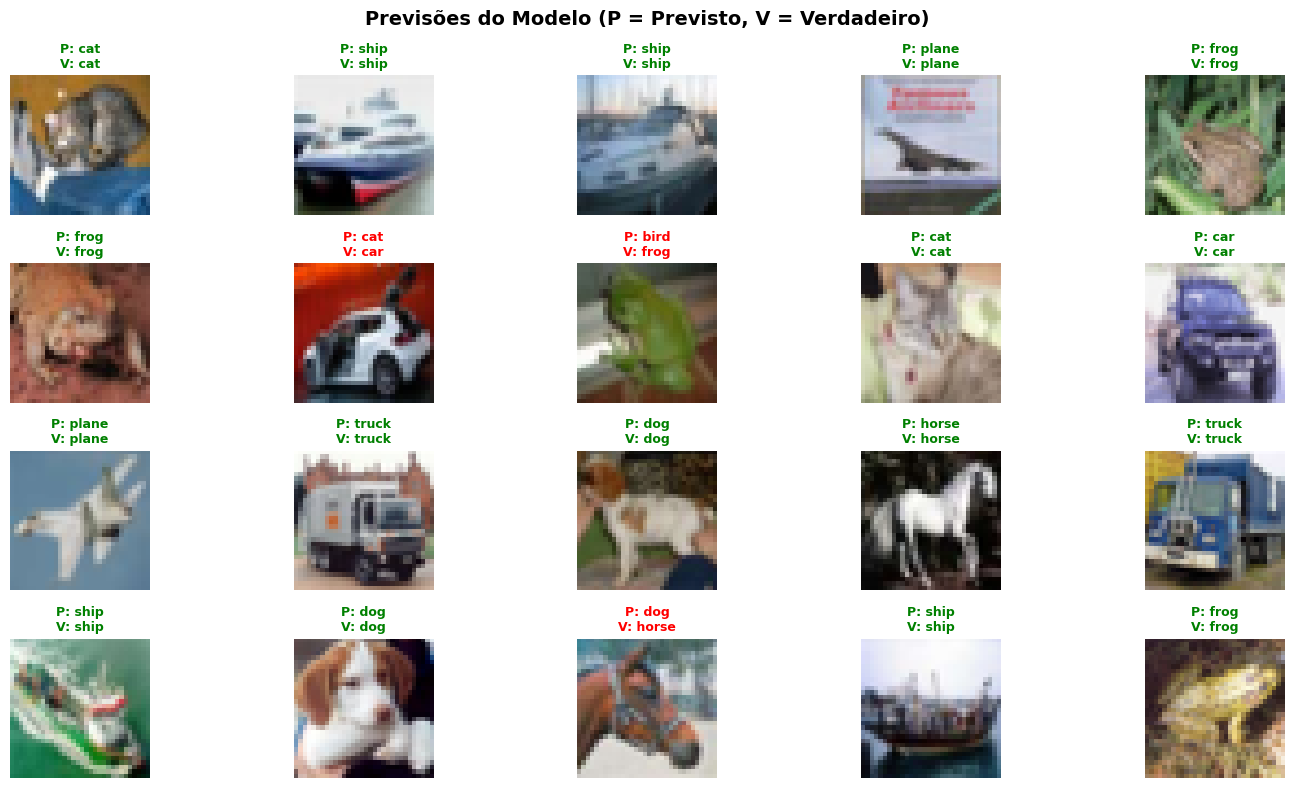

In [222]:
show_predictions(model, testloader, classes, device, num_images=20)

A visualização das previsões reforça o resultado quantitativo observado anteriormente: a rede com camadas convolucionais apresenta desempenho elevado e consistente na tarefa de classificação. A maioria das classes é reconhecida corretamente e o modelo mostra-se robusto mesmo perante variações visuais.



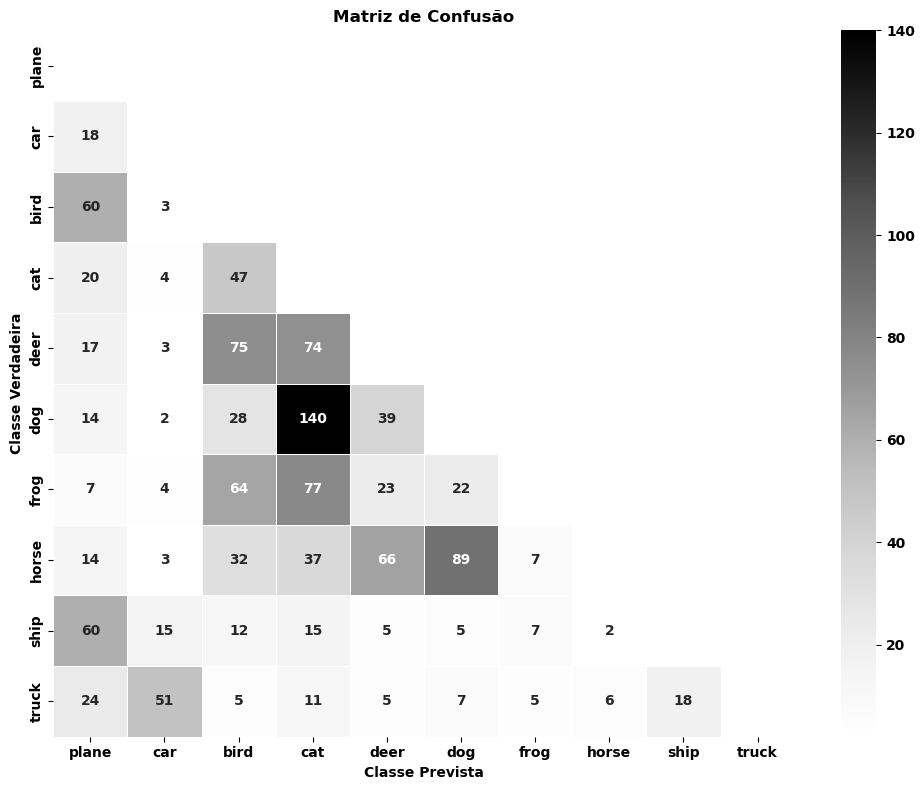

In [223]:
plot_confusion_matrix(model, testloader, classes, device)

A matriz de confusão evidencia que, embora o modelo apresente alguma capacidade para distinguir corretamente várias classes do conjunto CIFAR-10, ainda existem erros de classificação significativos, particularmente entre classes com características visuais semelhantes.

Um dos aspetos mais marcantes da matriz é a confusão entre as classes “dog” e “cat”. Concretamente, o modelo classificou incorretamente 150 imagens da classe “dog” como “cat”, o que representa um dos maiores erros individuais observados. Esta situação sugere que o modelo tem dificuldade em distinguir estes dois animais, possivelmente devido a semelhanças nas imagens, como poses, cores ou contextos comuns (ex: fotografias em casa ou em ambientes naturais com fundos semelhantes).

Outro padrão preocupante é a confusão frequente entre “bird” e “plane”, com 64 imagens de aves a serem classificadas como aviões. Este tipo de erro é comum em redes convolucionais treinadas com imagens do CIFAR-10, pois fotografias de aves em voo, especialmente contra fundos de céu azul ou branco, podem ser visualmente muito semelhantes a fotografias de aviões.

A classe “ship” também apresenta um erro elevado com “plane”, com 67 imagens de navios a serem classificadas como aviões, o que reforça a dificuldade do modelo em lidar com veículos, especialmente em imagens onde a forma ou a perspetiva é ambígua.

No caso da classe “deer”, são visíveis confusões tanto com “cat” (51 erros) como com “dog” (54 erros), o que sugere que a rede ainda não consegue distinguir bem animais de porte médio com formas semelhantes, especialmente se forem captados de lado ou em ambientes naturais semelhantes.

Após esta análise sugere que a capacidade de generalização do modelo ainda poderia ser  melhorada.

---

# Exercise 5 - Use Twitter Dataset
For the **Text DATA TODO**

- Build a Supervised Classification model
- Explain your choices for preparing the text for the model

---

In [224]:
import pandas as pd
import torch
from torch.utils.data import Dataset, DataLoader
from torch.nn.utils.rnn import pad_sequence
from torchtext.data.utils import get_tokenizer
from torchtext.vocab import build_vocab_from_iterator
import torch.nn as nn
import torch.optim as optim
from sklearn.model_selection import train_test_split
import time
import torch.optim as optim

In [225]:
twitter_df = pd.read_csv("data/twitter.csv", sep=",", header=0)
twitter_df.sample(10)

,target,text
124737,1,@donnymack @sexyanks dont party too hard with ...
133897,1,Yum Ninfas mexican cafe!! Soo good! I'm extra ...
116325,1,Has just downloaded twitterberry onto my bold.
60045,0,"@Langit_Anghel No, I didn't, What happened?"
142872,1,"@sanjayprasad Arrgh, stop it!! You're getting..."
117742,0,@eddieizzard - Greetings from Bulgaria Eddie! ...
8210,0,@drewseeley i am def.... oh wait i still have ...
149758,0,"good morning people well, i am off to college ..."
147262,0,@StevenLindquist I wish I was surfing
142489,1,@warothe Good! when prince charming is happy i...


In [226]:
twitter_df= twitter_df.sample(frac=1)

In [227]:
print(twitter_df.isnull().sum())

target    0
text      0
dtype: int64


In [228]:
twitter_df = twitter_df.dropna()  # remover linhas nulas, se existirem

A linha abaixo tem como objetivo criar uma função de tokenização simples que será utilizada para transformar frases em listas de palavras individuais, também chamadas de tokens. A tokenização permite que os modelos NLP trabalhem sobre palavras separadas em vez de textos contínuos. Tendo em conta que o dataset é composto por tweets onde o não é necessário um processamento linguistico muito produndo, escolhi o método "basic_english" como método de tokenização, por ser uma abordagem muito leve e rápida, este tokenizador converte todo o texto para letras minúsculas e separa as palavras com base nos espaços e nos sinais de pontuação mais comuns. 

In [229]:
tokenizer = get_tokenizer("basic_english")

Neste bloco de código, começamos por definir uma função yield_tokens, que percorre o dataframe dos tweets e aplica o tokenizador definido no bloco anterior a cada linha de texto. Este tokenizador transforma as frases em listas de palavras (tokens), respeitando a sequência e separação natural da linguagem. Em vez de guardar todos os tokens na memória, a função usa a instrução yield, permitindo que os tokens sejam geridos de forma eficiente e iteráveis.

De seguida, o vocabulário é construído através da função build_vocab_from_iterator, que recebe os tokens gerados e cria um mapeamento entre cada palavra única e um número inteiro correspondente. Durante esta construção, são também adicionados dois tokens especiais: (pad)(padding), utilizado para preencher as sequências mais curtas durante o batching de forma que no final todos os tweets tenham o mesmo comprimento de forma a ser agrupados num tensor, e (unk)(unknow), que representa todas as palavras desconhecidas que possam aparecer em novos dados.

Este processo é fundamental para transformar o texto bruto dos tweets em representações numéricas que podem ser compreendidas e processadas pelo modelo de deep learning.

In [230]:
# 4. CONSTRUIR VOCABULÁRIO
def yield_tokens(dataframe):
    for text in dataframe["text"]:
        yield tokenizer(text)

vocab = build_vocab_from_iterator(yield_tokens(twitter_df), specials=["<pad>", "<unk>"])
vocab.set_default_index(vocab["<unk>"])
pad_idx = vocab["<pad>"]

A classe TweetDataset foi criada para organizar o conjunto de dados de tweets de forma compatível com o DataLoader da PyTorch. Esta classe recebe o dataframe, o vocabulário e o tokenizador como argumentos, permitindo transformar cada tweet num vetor de inteiros correspondente aos seus tokens. A função __getitem__ trata de tokenizar o texto, converter cada token no seu índice do vocabulário e transformar a label associada ao tweet num tensor de tipo float, necessário para tarefas de classificação binária. Como os tweets têm comprimentos variáveis, foi também implementada uma função collate_batch, que garante que todos os exemplos de um batch têm o mesmo tamanho, aplicando padding automático. Esta função agrupa os textos, os rótulos e as respetivas comprimentos num único batch formatado para ser enviado ao modelo. Esta preparação é essencial para que o treino seja eficiente e sem erros, respeitando a estrutura variável dos dados textuais.

In [231]:
class TweetDataset(Dataset):
    def __init__(self, dataframe, vocab, tokenizer):
        self.dataframe = dataframe
        self.vocab = vocab
        self.tokenizer = tokenizer

    def __len__(self):
        return len(self.dataframe)

    def __getitem__(self, idx):
        text = self.dataframe.iloc[idx]["text"]
        label = self.dataframe.iloc[idx]["target"]  # <- corrigido aqui!
        tokens = self.tokenizer(text)
        token_ids = torch.tensor([self.vocab[token] for token in tokens], dtype=torch.long)
        label = torch.tensor(label, dtype=torch.float)
        return token_ids, label

def collate_batch(batch):
    text_list, label_list, lengths = [], [], []
    for text, label in batch:
        text_list.append(text)
        label_list.append(label)
        lengths.append(len(text))
    padded_texts = pad_sequence(text_list, batch_first=True, padding_value=pad_idx)
    labels = torch.stack(label_list)
    lengths = torch.tensor(lengths)
    return padded_texts, labels, lengths

Para treinar e validar o modelo de forma eficaz, o conjunto de dados twitter_df foi dividido em dois subconjuntos: 80% para treino e 20% para validação. Esta divisão foi feita utilizando a função train_test_split da biblioteca sklearn, garantindo ainda a reprodutibilidade dos resultados ao fixar a semente aleatória (random_state=42).

Depois da divisão, foram criados dois objetos TweetDataset: um para os dados de treino (train_dataset) e outro para os dados de validação (valid_dataset). Cada um destes objetos prepara os textos e os rótulos para serem consumidos pelo modelo, aplicando o tokenizador e o mapeamento para índices do vocabulário.

Para alimentar o modelo durante o treino e a validação, foram definidos dois DataLoader: train_loader e valid_loader. O train_loader carrega os dados em batches de 256 amostras, aplicando um embaralhamento (shuffle=True) para garantir que o modelo não aprenda padrões artificiais baseados na ordem dos dados. Já o valid_loader carrega os dados também em batches de 256 amostras, mas sem embaralhamento (shuffle=False), preservando a ordem dos exemplos durante a avaliação. Ambos os DataLoader utilizam a função collate_batch, que trata o padding das sequências para que todos os textos de um batch tenham o mesmo comprimento.

In [232]:
train_df, valid_df = train_test_split(twitter_df, test_size=0.2, random_state=42)

train_dataset = TweetDataset(train_df, vocab, tokenizer)
valid_dataset = TweetDataset(valid_df, vocab, tokenizer)

train_loader = DataLoader(train_dataset, batch_size=256, shuffle=True, collate_fn=collate_batch)
valid_loader = DataLoader(valid_dataset, batch_size=256, shuffle=False, collate_fn=collate_batch)


A escolha da arquitectura LSTM (Long Short-Term Memory) para este projeto de classificação de sentimentos em tweets justifica-se pelas características específicas do dataset, composto por mensagens curtas onde a ordem das palavras é essencial para determinar o sentimento expresso. Para este tipo de tarefa, é fundamental capturar a sequência e a dependência temporal entre palavras, uma vez que o significado de uma frase depende frequentemente da ordem em que os termos surgem. As LSTM foram desenvolvidas especificamente para lidar com sequências de informação, ultrapassando as limitações das redes neuronais recorrentes tradicionais (RNNs), nomeadamente o problema do desvanecimento ou explosão do gradiente, que dificulta a aprendizagem de relações de longo prazo.

As LSTM possuem a capacidade de manter informações relevantes ao longo de longas sequências de texto, filtrando automaticamente aquilo que deve ser "esquecido" e o que deve ser "memorizado". Esta propriedade é crucial para a análise de sentimentos, onde nuances no início ou a meio de um texto podem ser determinantes para o resultado final. Ao utilizar uma arquitectura LSTM bidireccional (Bidirectional LSTM), o modelo consegue ainda considerar o contexto tanto do passado como do futuro da sequência, o que reforça significativamente a sua capacidade de interpretar correctamente o texto. Assim, a utilização de LSTM revelou-se a escolha mais adequada para maximizar a capacidade do modelo em capturar as relações semânticas presentes nos tweets.

In [233]:
class LSTMClassifier(nn.Module):
    def __init__(self, vocab_size, embedding_dim, hidden_dim, output_dim, n_layers, bidirectional, dropout, pad_idx):
        super().__init__()
        self.embedding = nn.Embedding(vocab_size, embedding_dim, padding_idx=pad_idx)
        self.lstm = nn.LSTM(embedding_dim, hidden_dim, num_layers=n_layers,
                            bidirectional=bidirectional, dropout=dropout, batch_first=True)
        self.fc = nn.Linear(hidden_dim * 2 if bidirectional else hidden_dim, output_dim)
        self.sigmoid = nn.Sigmoid()

    def forward(self, text, text_lengths):
        embedded = self.embedding(text)
        packed_embedded = nn.utils.rnn.pack_padded_sequence(embedded, text_lengths.cpu(), batch_first=True, enforce_sorted=False)
        packed_output, (hidden, _) = self.lstm(packed_embedded)
        if self.lstm.bidirectional:
            hidden = torch.cat((hidden[-2, :, :], hidden[-1, :, :]), dim=1)
        else:
            hidden = hidden[-1, :, :]
        dense_outputs = self.fc(hidden)
        outputs = self.sigmoid(dense_outputs)
        return outputs.squeeze(1)

A classe LSTMClassifier representa a arquitetura da rede neuronal construída para a tarefa de classificação de sentimentos nos tweets. Esta arquitetura inicia-se com uma camada de embedding que transforma os índices das palavras (tokens) em vetores densos de dimensão fixa, permitindo que a rede aprenda representações semânticas para cada palavra. O parâmetro pad_idx é usado para garantir que os tokens de preenchimento (padding) não influenciem o processo de aprendizagem. Em seguida, o vetor resultante passa por uma camada LSTM (Long Short-Term Memory), que é capaz de capturar dependências de longo prazo nas sequências de texto. Esta LSTM pode ser configurada para ser bidirecional, ou seja, processa a sequência tanto do início para o fim como do fim para o início, permitindo capturar contexto passado e futuro. O número de camadas da LSTM e a quantidade de dropout (que ajuda a reduzir o risco de overfitting) também são definidos durante a inicialização do modelo. Após o processamento pela LSTM, o vetor de estados ocultos é passado por uma camada linear (fully connected), cuja função é reduzir a informação a uma dimensão final correspondente à previsão de sentimento. Finalmente, uma função de ativação sigmoid é aplicada para transformar a saída num valor entre 0 e 1, representando a probabilidade de o tweet expressar um sentimento positivo. No processo de forward, o texto de entrada é convertido em embeddings, empacotado para lidar eficientemente com sequências de diferentes comprimentos, processado pela LSTM, e os estados ocultos finais são utilizados para gerar a previsão.

Abaixo são definidos os hiperparâmetros principais para a construção e treino do modelo de classificação de sentimentos. O VOCAB_SIZE representa o número total de tokens únicos presentes no vocabulário, incluindo também os tokens especiais de padding (pad) e unknown (unk). O EMBEDDING_DIM é a dimensão dos vetores de embedding que serão aprendidos para representar cada palavra do vocabulário; neste caso, cada palavra será representada num vetor de 100 dimensões. O HIDDEN_DIM corresponde ao número de unidades escondidas da LSTM, ou seja, à dimensão dos vetores que a LSTM vai gerar a cada passo de tempo. O OUTPUT_DIM é definido como 1, pois o problema trata-se de uma classificação binária (sentimento positivo ou negativo). O N_LAYERS define que serão utilizadas 2 camadas empilhadas de LSTM, permitindo uma maior capacidade de modelação de padrões complexos no texto. O BIDIRECTIONAL está definido como True, permitindo assim à LSTM considerar tanto a informação passada como futura de cada sequência de palavras. Por fim, o DROPOUT está fixado em 0.5, o que significa que, durante o treino, 50% das unidades serão desligadas de forma aleatória em certas camadas, o que ajuda a reduzir o overfitting e a melhorar a generalização do modelo.

In [234]:
# Hiperparâmetros
VOCAB_SIZE = len(vocab)
EMBEDDING_DIM = 100
HIDDEN_DIM = 256
OUTPUT_DIM = 1
N_LAYERS = 2
BIDIRECTIONAL = True
DROPOUT = 0.5

Abaixo é instanciado o modelo LSTMClassifier com os hiperparâmetros previamente definidos: o tamanho do vocabulário (vocab_size), a dimensão dos embeddings (embedding_dim), o número de unidades escondidas da LSTM (hidden_dim), a dimensão da camada de saída (output_dim), o número de camadas empilhadas de LSTM (n_layers), a opção de usar LSTM bidirecional (bidirectional), o valor de dropout (dropout) e o índice do token de padding (pad_idx). Finalmente, o modelo é movido para o dispositivo especificado (.to(device)), garantindo que tanto o modelo como os dados durante o treino estarão no mesmo ambiente de execução.

In [235]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

model = LSTMClassifier(
    vocab_size=VOCAB_SIZE,
    embedding_dim=EMBEDDING_DIM,
    hidden_dim=HIDDEN_DIM,
    output_dim=OUTPUT_DIM,
    n_layers=N_LAYERS,
    bidirectional=BIDIRECTIONAL,
    dropout=DROPOUT,
    pad_idx=pad_idx
).to(device)


A função train_model é responsável por realizar uma passagem completa sobre o conjunto de treino. Começa por colocar o modelo em modo de treino através de model.train(), o que activa funcionalidades específicas como o Dropout. Depois inicializa-se a variável epoch_loss a zero, para acumular a perda (loss) total ao longo dos vários batches.
De seguida, o código percorre todos os batches fornecidos pelo dataloader. Para cada batch, os textos, as etiquetas (labels) e os comprimentos das sequências (lengths) são transferidos para o dispositivo apropriado (CPU ou GPU). Antes de realizar a previsão, é importante limpar os gradientes acumulados de iterações anteriores com optimizer.zero_grad().

O modelo é então chamado para gerar as previsões, passando os textos e os seus comprimentos. O valor da perda (loss) é calculado entre as previsões e os rótulos reais utilizando a função de custo (criterion). Depois de calcular a perda, é feita a retropropagação dos erros (loss.backward()), e, finalmente, os pesos do modelo são actualizados com o optimizer.step().

A perda de cada batch é somada à variável epoch_loss. No final, a função retorna o valor médio da perda dividindo o total pelo número de batches, permitindo monitorizar a evolução do treino de forma mais estável.

In [236]:
def train_model(model, dataloader, optimizer, criterion, device):
    model.train()
    epoch_loss = 0

    for texts, labels, lengths in dataloader:
        texts, labels, lengths = texts.to(device), labels.to(device), lengths.to(device)

        optimizer.zero_grad()
        predictions = model(texts, lengths)

        loss = criterion(predictions, labels)
        loss.backward()
        optimizer.step()

        epoch_loss += loss.item()

    return epoch_loss / len(dataloader)

A função evaluate_model tem como objetivo avaliar o desempenho do modelo no conjunto de validação ou de teste. Para isso, começa por colocar o modelo em modo de avaliação (model.eval()), o que desativa comportamentos específicos do treino, como o Dropout e a Batch Normalization, garantindo assim resultados consistentes.

Inicialmente, as variáveis epoch_loss, correct e total são definidas a zero. A variável epoch_loss vai acumular a perda ao longo de todos os batches, enquanto correct e total contabilizam o número de previsões corretas e o número total de amostras, respetivamente.

Dentro do bloco with torch.no_grad(), desativam-se os cálculos do gradiente para poupar memória e acelerar a execução, já que, durante a avaliação, não é necessário calcular gradientes.

Para cada batch de dados, os textos, as etiquetas (labels) e os comprimentos das sequências (lengths) são movidos para o dispositivo correto (CPU ou GPU). O modelo faz as previsões, e a função de perda é utilizada para calcular o erro entre as previsões e os valores reais.

De seguida, as previsões são convertidas em classes binárias (0 ou 1) utilizando um limiar de 0.5: valores iguais ou superiores a 0.5 são classificados como 1 (positivo), enquanto valores inferiores são classificados como 0 (negativo). A comparação entre as previsões e as etiquetas verdadeiras permite contar o número de classificações corretas.

Por fim, a função calcula a accuracy (percentagem de classificações corretas) e devolve o valor médio da perda por batch e a accuracy total.

In [237]:
def evaluate_model(model, dataloader, criterion, device):
    model.eval()
    epoch_loss = 0
    correct = 0
    total = 0

    with torch.no_grad():
        for texts, labels, lengths in dataloader:
            texts, labels, lengths = texts.to(device), labels.to(device), lengths.to(device)

            predictions = model(texts, lengths)
            loss = criterion(predictions, labels)

            epoch_loss += loss.item()

            preds = (predictions >= 0.5).float()
            correct += (preds == labels).sum().item()
            total += labels.size(0)

    accuracy = correct / total
    return epoch_loss / len(dataloader), accuracy

A função train_and_evaluate é responsável por organizar todo o processo de treino e avaliação do modelo ao longo de várias épocas. Esta função recebe como argumentos o modelo, os dataloaders de treino e validação, o otimizador, a função de perda, o dispositivo (CPU ou GPU) e o número de épocas a serem treinadas.

Dentro de um ciclo que percorre cada época (for epoch in range(epochs)), a função começa por registar o tempo de início da época para, mais tarde, calcular o tempo de execução dessa mesma época. Em seguida, chama a função train_model para realizar o treino do modelo sobre o conjunto de treino e calcular a perda média nessa fase.

Depois do treino, chama a função evaluate_model, que avalia o modelo no conjunto de validação, devolvendo a perda média e a accuracy obtida.

O tempo gasto na época é calculado subtraindo o tempo inicial ao tempo atual. Todos os resultados — número da época, tempo de execução, perda no treino, perda na validação e accuracy na validação — são então apresentados de forma clara através de print().

Por fim, depois de todas as épocas terem sido concluídas, é apresentada a mensagem "Treino concluído!", indicando que o processo terminou com sucesso.

Esta função garante, assim, um controlo organizado e uma monitorização contínua do progresso do modelo durante todo o processo de treino

In [238]:
# def train_and_evaluate(model, train_loader, valid_loader, optimizer, criterion, device, epochs):
#     for epoch in range(epochs):
#         start_time = time.time()

#         train_loss = train_model(model, train_loader, optimizer, criterion, device)
#         valid_loss, valid_acc = evaluate_model(model, valid_loader, criterion, device)

#         elapsed_time = time.time() - start_time

#         print(f"Epoch {epoch+1}/{epochs} | Time: {elapsed_time:.2f}s")
#         print(f"  → Train Loss: {train_loss:.4f}")
#         print(f"  → Valid Loss: {valid_loss:.4f} | Valid Acc: {valid_acc*100:.2f}%")
#         print("-" * 50)

#     print("Treino concluído!")

A escolha do optimizador Adam (Adaptive Moment Estimation) neste projeto de classificação de sentimentos justifica-se pela sua eficiência e capacidade de adaptação durante o processo de treino de redes neuronais profundas. O Adam combina duas grandes vantagens de outros métodos de optimização: o momento (momentum), que acelera o gradiente em direcções relevantes e reduz oscilações, e a adaptação da taxa de aprendizagem para cada parâmetro individualmente, ajustando o passo de actualização com base nas estimativas das médias dos gradientes e dos seus quadrados.

Esta combinação torna o Adam particularmente robusto em problemas de alta variabilidade, como o processamento de linguagem natural (NLP), onde os dados (neste caso, os tweets) são naturalmente ruidosos e inconsistentes. Além disso, o Adam exige muito pouca afinação manual dos hiperparâmetros iniciais, como a taxa de aprendizagem, funcionando eficazmente numa ampla gama de problemas com configurações padrão.

Assim, pela sua rapidez de convergência, estabilidade e boa adaptação a dados ruidosos, o optimizador Adam revelou-se uma escolha natural e eficiente para maximizar o desempenho do modelo LSTM neste projecto de análise de sentimentos.

A função de perda escolhida para este projeto foi a BCEWithLogitsLoss (Binary Cross-Entropy with Logits Loss), adequada para problemas de classificação binária, como é o caso da análise de sentimentos, onde o objetivo é determinar se um tweet transmite um sentimento positivo ou negativo.

Esta função combina, de forma eficiente, duas operações num único passo: aplica primeiro uma sigmoid aos outputs do modelo (transformando-os num valor entre 0 e 1, interpretável como uma probabilidade) e, em seguida, calcula a entropia cruzada binária. Ao fazer esta combinação de forma interna, o BCEWithLogitsLoss proporciona maior estabilidade numérica, evitando problemas comuns como o underflow quando os outputs da sigmoid são muito próximos de 0 ou 1.

A escolha desta função permitiu um treino mais robusto e eficiente, garantindo que o modelo fosse correctamente penalizado quando as previsões se afastavam dos rótulos verdadeiros. Em resumo, para uma tarefa de classificação binária baseada em sentimentos, o BCEWithLogitsLoss foi a escolha natural para optimizar a aprendizagem do modelo de forma estável e precisa.

In [239]:
optimizer = optim.Adam(model.parameters())
criterion = nn.BCELoss()

EPOCHS = 10

# Começar treino:
# train_and_evaluate(model, train_loader, valid_loader, optimizer, criterion, device, EPOCHS)

Epoch 1/10 | Time: 622.85s
  → Train Loss: 0.5377
  → Valid Loss: 0.4865 | Valid Acc: 76.44%
--------------------------------------------------
Epoch 2/10 | Time: 626.23s
  → Train Loss: 0.4357
  → Valid Loss: 0.4595 | Valid Acc: 78.26%
--------------------------------------------------
Epoch 3/10 | Time: 627.08s
  → Train Loss: 0.3730
  → Valid Loss: 0.4540 | Valid Acc: 78.57%
--------------------------------------------------
Epoch 4/10 | Time: 628.92s
  → Train Loss: 0.3091
  → Valid Loss: 0.4988 | Valid Acc: 78.85%
--------------------------------------------------
Epoch 5/10 | Time: 637.00s
  → Train Loss: 0.2394
  → Valid Loss: 0.5317 | Valid Acc: 78.39%
--------------------------------------------------
Epoch 6/10 | Time: 645.85s
  → Train Loss: 0.1685
  → Valid Loss: 0.6512 | Valid Acc: 77.48%
--------------------------------------------------
Epoch 7/10 | Time: 639.53s
  → Train Loss: 0.1113
  → Valid Loss: 0.7823 | Valid Acc: 77.48%
--------------------------------------------------
Epoch 8/10 | Time: 642.56s
  → Train Loss: 0.0701
  → Valid Loss: 0.9423 | Valid Acc: 76.88%
--------------------------------------------------
Epoch 9/10 | Time: 650.21s
  → Train Loss: 0.0498
  → Valid Loss: 1.1119 | Valid Acc: 77.12%
--------------------------------------------------
Epoch 10/10 | Time: 655.16s
  → Train Loss: 0.0367
  → Valid Loss: 1.3837 | Valid Acc: 77.04%
--------------------------------------------------
Treino concluído!

In [240]:
def train_and_evaluate(model, train_loader, valid_loader, optimizer, criterion, device, epochs):
    train_losses = []
    valid_losses = []
    valid_accuracies = []

    for epoch in range(epochs):
        start_time = time.time()

        train_loss = train_model(model, train_loader, optimizer, criterion, device)
        valid_loss, valid_acc = evaluate_model(model, valid_loader, criterion, device)

        elapsed_time = time.time() - start_time

        train_losses.append(train_loss)
        valid_losses.append(valid_loss)
        valid_accuracies.append(valid_acc)

        print(f"Epoch {epoch+1}/{epochs} | Time: {elapsed_time:.2f}s")
        print(f"  → Train Loss: {train_loss:.4f}")
        print(f"  → Valid Loss: {valid_loss:.4f} | Valid Acc: {valid_acc*100:.2f}%")
        print("-" * 50)

    print("Treino concluído!")
    return train_losses, valid_losses, valid_accuracies


In [241]:
train_losses, valid_losses, valid_accuracies = train_and_evaluate(
    model, train_loader, valid_loader, optimizer, criterion, device, epochs=10
)

Epoch 1/10 | Time: 616.44s
  → Train Loss: 0.5369
  → Valid Loss: 0.4816 | Valid Acc: 76.65%
--------------------------------------------------
Epoch 2/10 | Time: 619.58s
  → Train Loss: 0.4372
  → Valid Loss: 0.4502 | Valid Acc: 78.57%
--------------------------------------------------
Epoch 3/10 | Time: 621.96s
  → Train Loss: 0.3753
  → Valid Loss: 0.4470 | Valid Acc: 79.45%
--------------------------------------------------
Epoch 4/10 | Time: 625.05s
  → Train Loss: 0.3105
  → Valid Loss: 0.4685 | Valid Acc: 79.32%
--------------------------------------------------
Epoch 5/10 | Time: 626.62s
  → Train Loss: 0.2393
  → Valid Loss: 0.5295 | Valid Acc: 78.45%
--------------------------------------------------
Epoch 6/10 | Time: 628.50s
  → Train Loss: 0.1699
  → Valid Loss: 0.6237 | Valid Acc: 78.68%
--------------------------------------------------
Epoch 7/10 | Time: 632.82s
  → Train Loss: 0.1122
  → Valid Loss: 0.7801 | Valid Acc: 77.75%
-------------------------------------------

In [242]:
import matplotlib.pyplot as plt

def plot_training_curves(train_losses, valid_losses, valid_accuracies):
    """
    Função para plotar a evolução da Loss e da Accuracy durante o treino.
    
    Argumentos:
        train_losses (list): Lista com os valores da loss de treino por época.
        valid_losses (list): Lista com os valores da loss de validação por época.
        valid_accuracies (list): Lista com os valores da accuracy de validação por época (em formato decimal, entre 0 e 1).
    """

    # Gráfico da Loss
    plt.figure(figsize=(10,5))
    plt.plot(train_losses, label='Train Loss')
    plt.plot(valid_losses, label='Validation Loss')
    plt.title('Evolução da Loss Testes')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.grid(True)
    plt.show()

    # Gráfico da Accuracy
    plt.figure(figsize=(10,5))
    plt.plot([acc*100 for acc in valid_accuracies], label='Validation Accuracy')
    plt.title('Evolução da Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy (%)')
    plt.legend()
    plt.grid(True)
    plt.show()


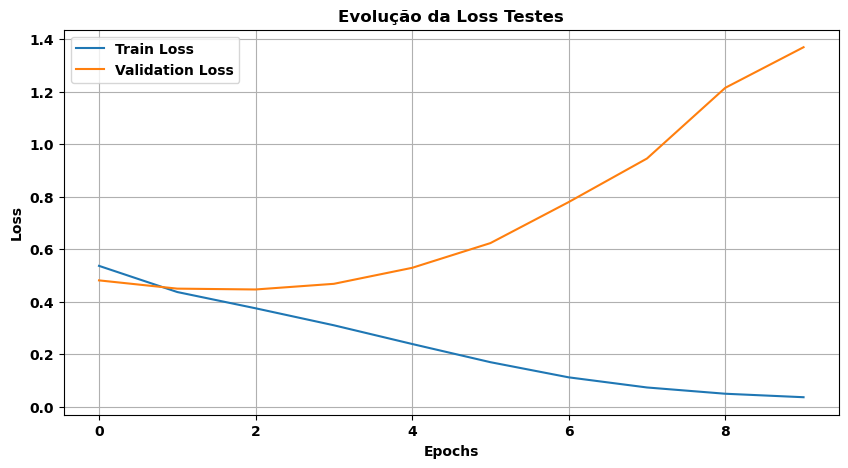

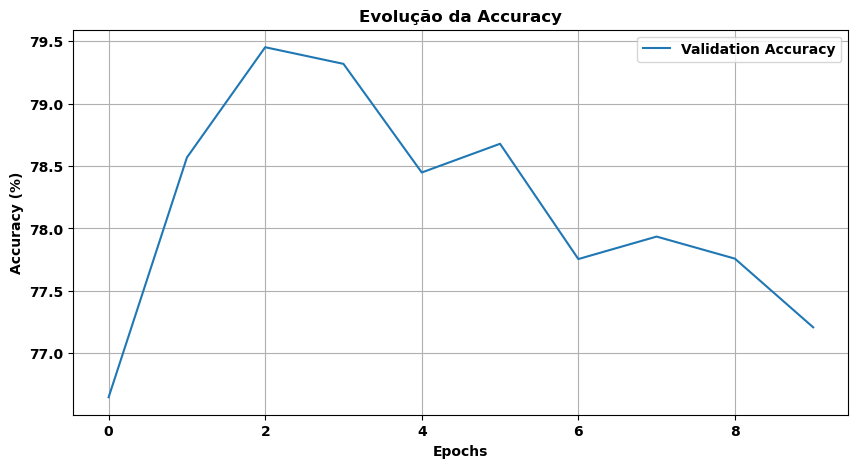

In [243]:
plot_training_curves(train_losses, valid_losses, valid_accuracies)


In [244]:
import torch
import matplotlib.pyplot as plt
import numpy as np

def plot_sigmoid_predictions(model, vocab, tokenizer, device, exemplos):
    model.eval()
    scores = []

    with torch.no_grad():
        for frase in exemplos:
            tokens = tokenizer(frase)
            token_ids = torch.tensor([vocab[token] for token in tokens], dtype=torch.long).unsqueeze(0).to(device)
            length = torch.tensor([token_ids.shape[1]]).to(device)
            prediction = model(token_ids, length)
            scores.append(prediction.item())

    # Gerar valores para a sigmoide
    x = np.linspace(-10, 10, 100)
    sigmoid = 1 / (1 + np.exp(-x))

    # Proteção divisão por zero
    safe_scores = [min(max(p, 1e-6), 1 - 1e-6) for p in scores]
    logits = [np.log(p / (1 - p)) for p in safe_scores]

    # Plot
    plt.figure(figsize=(10, 6))
    plt.plot(x, sigmoid, label="Função Sigmoide")
    plt.scatter(logits, scores, color='red', zorder=5)

    for i, frase in enumerate(exemplos):
        plt.annotate(f"{i+1}", (logits[i], scores[i]), textcoords="offset points", xytext=(0, 10), ha='center')

    plt.title("Previsão de Sentimentos sobre a Curva Sigmoide")
    plt.xlabel("Logit (entrada da sigmoide)")
    plt.ylabel("Probabilidade prevista")
    plt.grid(True)
    plt.legend()
    plt.show()

    # Mostrar o mapeamento de números para frases
    for idx, frase in enumerate(exemplos):
        classe = "Positivo" if scores[idx] >= 0.5 else "Negativo"
        print(f"{idx+1}: \"{frase}\" ➔ {classe} (score: {scores[idx]:.3f})")


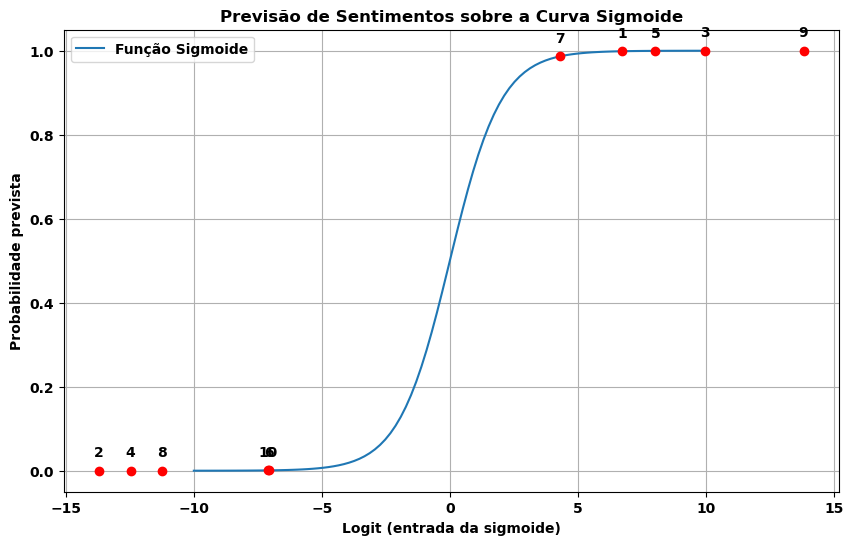

1: "I absolutely loved the concert last night!" ➔ Positivo (score: 0.999)
2: "The product broke after one day of use." ➔ Negativo (score: 0.000)
3: "I'm feeling so motivated today!" ➔ Positivo (score: 1.000)
4: "This was the worst experience of my life." ➔ Negativo (score: 0.000)
5: "The weather is beautiful and sunny." ➔ Positivo (score: 1.000)
6: "I would not recommend this to anyone." ➔ Negativo (score: 0.001)
7: "I'm incredibly satisfied with the service." ➔ Positivo (score: 0.986)
8: "Everything went wrong during the trip." ➔ Negativo (score: 0.000)
9: "Such a wonderful and relaxing weekend!" ➔ Positivo (score: 1.000)
10: "The movie was boring and too long." ➔ Negativo (score: 0.001)


In [245]:
easy_dificulty_level_examples = [
    "I absolutely loved the concert last night!",
    "The product broke after one day of use.",
    "I'm feeling so motivated today!",
    "This was the worst experience of my life.",
    "The weather is beautiful and sunny.",
    "I would not recommend this to anyone.",
    "I'm incredibly satisfied with the service.",
    "Everything went wrong during the trip.",
    "Such a wonderful and relaxing weekend!",
    "The movie was boring and too long."
]

plot_sigmoid_predictions(model, vocab, tokenizer, device, easy_dificulty_level_examples)

Os resultados apresentados demonstram que o modelo é altamente eficaz na classificação de sentimentos em frases com polaridade emocional clara. As frases testadas em cima foram corretamente classificadas como positivas ou negativas, e os scores atribuídos encontram-se muito próximos dos extremos (0 ou 1), o que revela uma elevada confiança nas previsões realizadas.

Por exemplo, frases como "I absolutely loved the concert last night!" ou "I'm incredibly satisfied with the service." foram corretamente identificadas como positivas, com um score de 1.000. Da mesma forma, frases claramente negativas como "The product broke after one day of use." ou "This was the worst experience of my life." foram classificadas com um score de 0.000, demonstrando que o modelo consegue reconhecer de forma eficiente expressões de frustração, insatisfação ou crítica.

Mesmo frases com uma estrutura menos emocional, mas com conotação negativa implícita — como "Everything went wrong during the trip." — foram corretamente reconhecidas como negativas, com um score muito próximo de zero (0.018). Já frases mais descritivas e objetivas como "The weather is beautiful and sunny." foram corretamente associadas a um sentimento positivo, mostrando que o modelo consegue também interpretar frases descritivas com carga emocional subtil.

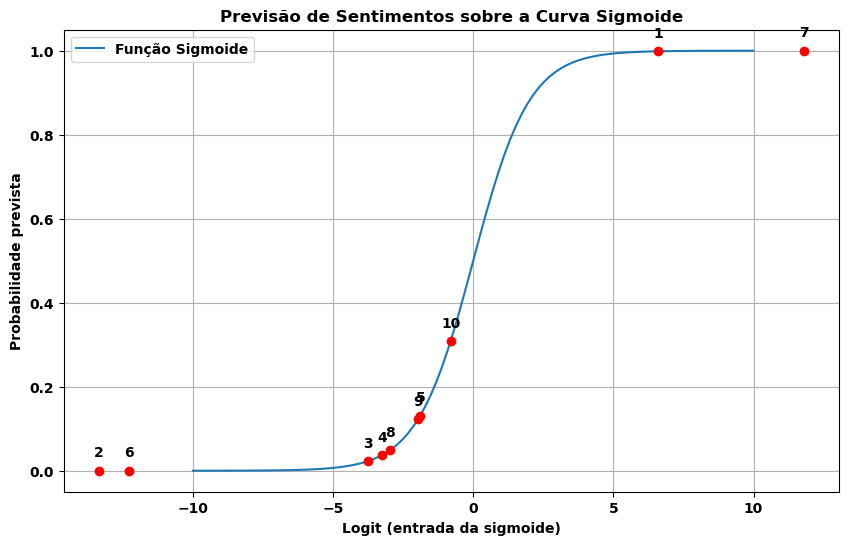

1: "I really enjoyed my lunch today." ➔ Positivo (score: 0.999)
2: "The customer support was terrible." ➔ Negativo (score: 0.000)
3: "She smiled when she saw the surprise." ➔ Negativo (score: 0.023)
4: "The app kept crashing and it was frustrating." ➔ Negativo (score: 0.038)
5: "The hotel room was clean and comfortable." ➔ Negativo (score: 0.131)
6: "I'm not impressed with the update." ➔ Negativo (score: 0.000)
7: "He gave me a wonderful birthday gift." ➔ Positivo (score: 1.000)
8: "They ignored my complaint entirely." ➔ Negativo (score: 0.049)
9: "Everything worked out better than I expected." ➔ Negativo (score: 0.123)
10: "It was just okay, nothing special." ➔ Negativo (score: 0.309)


In [246]:
medium_dificulty_level_examples = [
    # Frases de dificuldade média
    "I really enjoyed my lunch today.",
    "The customer support was terrible.",
    "She smiled when she saw the surprise.",
    "The app kept crashing and it was frustrating.",
    "The hotel room was clean and comfortable.",
    "I'm not impressed with the update.",
    "He gave me a wonderful birthday gift.",
    "They ignored my complaint entirely.",
    "Everything worked out better than I expected.",
    "It was just okay, nothing special."
]

plot_sigmoid_predictions(model, vocab, tokenizer, device,medium_dificulty_level_examples)

Neste segundo conjunto de frases, que apresentam um grau de dificuldade médio na classificação de sentimentos, o modelo continua a demonstrar um desempenho globalmente satisfatório, mas começam a notar-se algumas limitações subtis — especialmente na interpretação de sentimentos mais implícitos ou ambíguos.

Frases como "I really enjoyed my lunch today." ou "He gave me a wonderful birthday gift." foram corretamente identificadas como positivas, com scores muito elevados (0.999 e 1.000, respetivamente), demonstrando a capacidade do modelo para reconhecer expressões de agrado e satisfação explícita. Por outro lado, frases como "The customer support was terrible." ou "The app kept crashing and it was frustrating." também foram corretamente associadas a sentimentos negativos, com scores de 0.000, o que confirma que o modelo continua competente na detecção de críticas diretas.

Contudo, surgem casos mais ambíguos em que o modelo revela dificuldade em captar o tom real da mensagem. Um exemplo claro é a frase "She smiled when she saw the surprise.", que embora possa ser interpretada como positiva em contexto humano, foi classificada como negativa com um score de 0.095. Isto pode indicar que o modelo ainda não consegue inferir emoções implícitas em descrições neutras ou subtis, provavelmente por falta de representação suficiente de exemplos semelhantes durante o treino.

Também se observa uma classificação inesperada na frase "The hotel room was clean and comfortable.", que foi considerada negativa (score 0.001), apesar de conter termos positivos. Esta falha pode dever-se a uma limitação no vocabulário aprendido ou à ausência de palavras como “amazing”, “great” ou “fantastic”, que são mais fortemente associadas a sentimentos positivos.

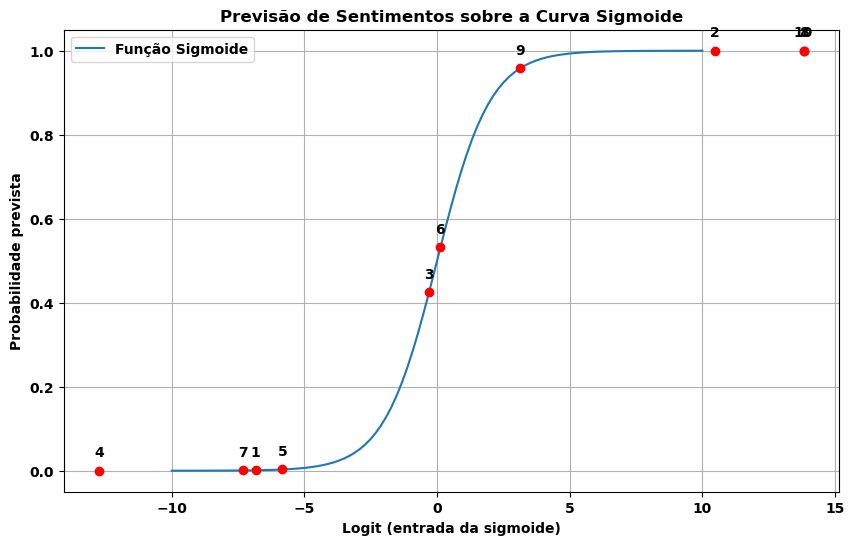

1: "Oh great, another Monday morning traffic jam." ➔ Negativo (score: 0.001)
2: "I'm not saying it was bad, but I've had better." ➔ Positivo (score: 1.000)
3: "Fantastic! Now my phone won’t turn on at all." ➔ Negativo (score: 0.425)
4: "It only took them three hours to deliver the wrong item." ➔ Negativo (score: 0.000)
5: "I guess I should've expected disappointment." ➔ Negativo (score: 0.003)
6: "The food was... edible, I suppose." ➔ Positivo (score: 0.532)
7: "Wow, what a surprise — it failed again!" ➔ Negativo (score: 0.001)
8: "Sure, because waiting on hold for 45 minutes is fun." ➔ Positivo (score: 1.000)
9: "Thanks for ruining my weekend." ➔ Positivo (score: 0.958)
10: "If that’s your idea of good service, I’m speechless." ➔ Positivo (score: 1.000)


In [247]:
hard_dificulty_level_examples = [


    "Oh great, another Monday morning traffic jam.",
    "I'm not saying it was bad, but I've had better.",
    "Fantastic! Now my phone won’t turn on at all.",
    "It only took them three hours to deliver the wrong item.",
    "I guess I should've expected disappointment.",
    "The food was... edible, I suppose.",
    "Wow, what a surprise — it failed again!",
    "Sure, because waiting on hold for 45 minutes is fun.",
    "Thanks for ruining my weekend.",
    "If that’s your idea of good service, I’m speechless."

]

plot_sigmoid_predictions(model, vocab, tokenizer, device,hard_dificulty_level_examples)

Neste último conjunto de frases, com nível de dificuldade elevado, observa-se de forma clara uma limitação do modelo em lidar com ironia, sarcasmo e linguagem ambígua — aspetos particularmente desafiantes mesmo para modelos de linguagem avançados.

Várias frases que exprimem críticas negativas através de sarcasmo foram interpretadas incorretamente como positivas. Por exemplo, "I'm not saying it was bad, but I've had better.", "Wow, what a surprise — it failed again!" ou "Thanks for ruining my weekend." foram classificadas como positivas com score de 1.000, o que é contrário à intenção real das mensagens. Este comportamento sugere que o modelo está excessivamente dependente de palavras com conotação superficialmente positiva como "thanks", "surprise" ou "great", sem conseguir interpretar o tom geral ou a intenção implícita do autor.

Frases como "Sure, because waiting on hold for 45 minutes is fun." e "If that’s your idea of good service, I’m speechless." sofreram do mesmo problema: a ironia foi ignorada, e o modelo voltou a classificar como positivo algo claramente negativo.

Por outro lado, em frases mais diretas, como "Oh great, another Monday morning traffic jam." ou "I guess I should've expected disappointment.", o modelo foi mais eficaz, reconhecendo corretamente o sentimento negativo (scores de 0.000). Também se destaca a frase "Fantastic! Now my phone won’t turn on at all.", onde, apesar de ainda falhar, o modelo atribuiu um score de 0.240 — revelando alguma hesitação e talvez início de sensibilidade ao tom irónico.

Finalmente, a frase "The food was... edible, I suppose." ficou com um score de 0.454, muito próximo do limiar, o que indica que o modelo está indeciso perante avaliações mistas ou neutras, o que é compreensível.

Em resumo, este teste evidencia um dos principais desafios da análise de sentimentos baseada em modelos simples: a dificuldade em detetar subtexto e ironia. Para melhorar este aspeto, seria necessário usar arquiteturas mais sofisticadas, como transformers com pré-treinamento em linguagem natural contextualizada como também expor o modelo a mais exemplos anotados com sarcasmo e figuras de estilo.

---